In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv

--2020-09-16 04:02:34--  https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 363 [text/plain]
Saving to: ‘income.csv.1’

income.csv.1        100%[===================>]     363  --.-KB/s    in 0s      

2020-09-16 04:02:34 (17.5 MB/s) - ‘income.csv.1’ saved [363/363]



In [ ]:
df=pd.read_csv("/content/income.csv")

In [ ]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


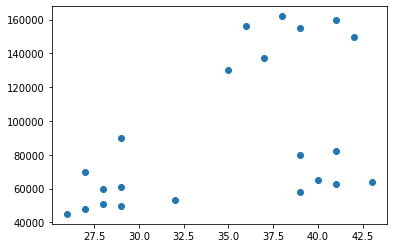

In [ ]:
plt.scatter(df["Age"],df["Income($)"])

In [ ]:
df[["Age","Income($)"]]

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age","Income($)"]])

In [ ]:
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted

In [ ]:
df

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


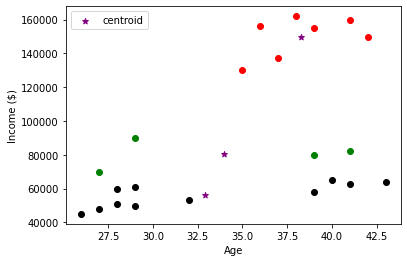

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalar = MinMaxScaler()

In [ ]:
scalar.fit(df[["Age"]])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
df['Age1']=scalar.transform(df[["Age"]])

In [ ]:
df

,Name,Age,Income($),cluster,Age1
0,Rob,27,70000,0,0.058824
1,Michael,29,90000,0,0.176471
2,Mohan,29,61000,2,0.176471
3,Ismail,28,60000,2,0.117647
4,Kory,42,150000,1,0.941176
5,Gautam,39,155000,1,0.764706
6,David,41,160000,1,0.882353
7,Andrea,38,162000,1,0.705882
8,Brad,36,156000,1,0.588235
9,Angelina,35,130000,1,0.529412


In [ ]:
scalar2 = MinMaxScaler()
scalar2.fit(df[["Income($)"]])
df['Income($)2']=scalar2.transform(df[["Income($)"]])

In [ ]:
df

,Name,Age,Income($),cluster,Age1,Income($)2
0,Rob,27,70000,0,0.058824,0.213675
1,Michael,29,90000,0,0.176471,0.384615
2,Mohan,29,61000,2,0.176471,0.136752
3,Ismail,28,60000,2,0.117647,0.128205
4,Kory,42,150000,1,0.941176,0.897436
5,Gautam,39,155000,1,0.764706,0.940171
6,David,41,160000,1,0.882353,0.982906
7,Andrea,38,162000,1,0.705882,1.000000
8,Brad,36,156000,1,0.588235,0.948718
9,Angelina,35,130000,1,0.529412,0.726496


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age1","Income($)2"]])

In [ ]:
df["cluster1"]=y_predicted

In [ ]:
df

,Name,Age,Income($),cluster,Age1,Income($)2,cluster1
0,Rob,27,70000,0,0.058824,0.213675,1
1,Michael,29,90000,0,0.176471,0.384615,1
2,Mohan,29,61000,2,0.176471,0.136752,1
3,Ismail,28,60000,2,0.117647,0.128205,1
4,Kory,42,150000,1,0.941176,0.897436,0
5,Gautam,39,155000,1,0.764706,0.940171,0
6,David,41,160000,1,0.882353,0.982906,0
7,Andrea,38,162000,1,0.705882,1.000000,0
8,Brad,36,156000,1,0.588235,0.948718,0
9,Angelina,35,130000,1,0.529412,0.726496,0


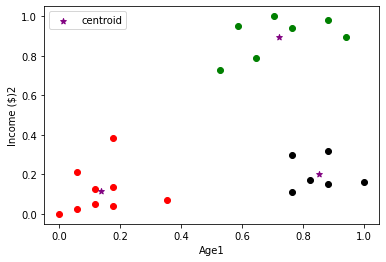

In [ ]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]
plt.scatter(df1.Age1,df1['Income($)2'],color='green')
plt.scatter(df2.Age1,df2['Income($)2'],color='red')
plt.scatter(df3.Age1,df3['Income($)2'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age1')
plt.ylabel('Income ($)2')
plt.legend()

In [ ]:
km.cluster_centers_[0]

array([0.72268908, 0.8974359 ])

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age1','Income($)2']])
    sse.append(km.inertia_)

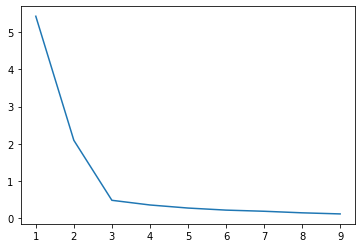

In [ ]:
plt.plot(k_rng,sse)

In [ ]:
import numpy as np
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])